This notebook analyses data from the following sources:
1) https://ride.citibikenyc.com/system-data - data about bike rides in New York made in September 2021 with the bike share program Citi Bike, where a customer can rent a bike at any station and return it at any other station  
2) https://www.weather.gov/ - weather data about September 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the City Bike Trip data

In [2]:
df1 = pd.read_csv('../../DATA/202109-citibike-tripdata.csv', low_memory=False)

In [3]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member


In [4]:
df1.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3280216,8A1C8DB4249BF100,classic_bike,2021-09-26 16:00:45,2021-09-26 16:20:51,8 Ave & W 31 St,6450.05,W 67 St & Broadway,7116.04,40.750585,-73.994685,40.774925,-73.982666,casual
3280217,C290EE73DF58AD79,classic_bike,2021-09-07 08:22:06,2021-09-07 08:38:40,S Portland Ave & Hanson Pl,4354.05,S 3 St & Bedford Ave,5235.05,40.685396,-73.974315,40.712605,-73.962644,casual
3280218,E42F8B93C4168658,classic_bike,2021-09-30 20:50:23,2021-09-30 20:59:13,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,casual
3280219,7221F0C58026A827,classic_bike,2021-09-08 19:06:24,2021-09-08 19:10:57,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,member
3280220,689F3FAE372C013C,classic_bike,2021-09-27 07:58:57,2021-09-27 08:02:31,West End Ave & W 60 St,7059.08,W 67 St & Broadway,7116.04,40.772370,-73.990050,40.774925,-73.982666,member


In [5]:
# Convert dates to datetime objects
df1['started_at'] = pd.to_datetime(df1['started_at'])
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

In [7]:
df1['started_at']

0         2021-09-01 10:26:45
1         2021-09-04 09:52:40
2         2021-09-06 17:07:40
3         2021-09-28 16:53:43
4         2021-09-19 09:37:47
                  ...        
3280216   2021-09-26 16:00:45
3280217   2021-09-07 08:22:06
3280218   2021-09-30 20:50:23
3280219   2021-09-08 19:06:24
3280220   2021-09-27 07:58:57
Name: started_at, Length: 3280221, dtype: datetime64[ns]

In [8]:
df1[df1['started_at']>=df1['ended_at']]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2189,7DCF751AD2C00269,classic_bike,2021-09-03 13:17:16,2021-09-03 13:17:16,Central Park W & W 97 St,7538.18,Central Park W & W 97 St,7538.18,40.792495,-73.964171,40.792495,-73.964171,member
2246,95140F55A2271475,classic_bike,2021-09-29 16:51:29,2021-09-29 16:46:30,8 Ave & W 38 St,6526.05,8 Ave & W 38 St,6526.05,40.754610,-73.991770,40.754610,-73.991770,casual
3643,D23E9C0240DF07E2,classic_bike,2021-09-18 22:03:04,2021-09-18 22:03:04,Wythe Ave & Metropolitan Ave,5348.02,NaN,NaN,40.716887,-73.963198,40.720000,-73.960000,casual
6680,F1BDA21765B9213B,classic_bike,2021-09-01 17:02:06,2021-09-01 17:02:06,Flushing Ave & Vanderbilt Ave,4762.05,Flushing Ave & Vanderbilt Ave,4762.05,40.697950,-73.970776,40.697950,-73.970776,member
8479,5C3A05322DAA442E,classic_bike,2021-09-04 23:38:17,2021-09-04 23:38:17,Howard St & Centre St,5422.04,NaN,NaN,40.719105,-73.999733,40.720000,-74.000000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252544,EAC9C523D608B9EF,classic_bike,2021-09-15 22:51:10,2021-09-15 22:51:10,West St & Chambers St,5329.03,West St & Chambers St,5329.03,40.717548,-74.013221,40.717548,-74.013221,member
3260672,F1890B88EF00C349,classic_bike,2021-09-29 18:51:47,2021-09-29 18:51:46,10 Ave & W 28 St,6459.04,10 Ave & W 28 St,6459.04,40.750664,-74.001768,40.750664,-74.001768,member
3263018,7394B85BB00FF969,classic_bike,2021-09-29 17:06:01,2021-09-29 16:58:36,10 Ave & W 28 St,6459.04,10 Ave & W 28 St,6459.04,40.750664,-74.001768,40.750664,-74.001768,casual
3263046,4A58AFBA3842FAD7,classic_bike,2021-09-29 15:55:14,2021-09-29 15:52:15,Broadway & W 53 St,6779.05,Broadway & W 53 St,6779.05,40.763441,-73.982681,40.763441,-73.982681,casual


There are several instances where the starting time is after the ending time. These must be cases of mistaken data. We remove those anomalous points.

In [9]:
df1 = df1[df1['started_at']<df1['ended_at']]

In [10]:
# Check that all dates are in September
df1['started_at'].dt.month.unique()

array([9])

In [11]:
df1['started_at'].dt.day.min(), df1['started_at'].dt.day.max()

(1, 30)

In [12]:
# Check that it covers all days of September
np.sort(df1['started_at'].dt.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [13]:
# Extract date only
df1['Date'] = pd.to_datetime(df1['started_at'].dt.date)

In [14]:
df1['Date']

0         2021-09-01
1         2021-09-04
2         2021-09-06
3         2021-09-28
4         2021-09-19
             ...    
3280216   2021-09-26
3280217   2021-09-07
3280218   2021-09-30
3280219   2021-09-08
3280220   2021-09-27
Name: Date, Length: 3279408, dtype: datetime64[ns]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279408 entries, 0 to 3280220
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Date                datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 375.3+ MB


In [16]:
df1.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       18
start_station_id         18
end_station_name      15158
end_station_id        15158
start_lat                 0
start_lng                 0
end_lat                8784
end_lng                8784
member_casual             0
Date                      0
dtype: int64

### Loading the Weather data

In [17]:
df2 = pd.read_csv('../../DATA/weather_data.csv', skiprows=4)

In [18]:
df2.columns = ['Date', 'Max_temperature', 'Min_temperature', 'Average_temp', 'Departure_temp',
              'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']

In [19]:
df2 = df2.iloc[:30]

In [20]:
df2

,Date,Max_temperature,Min_temperature,Average_temp,Departure_temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-09-01,78,63.0,70.5,-3.3,0,6,7.13,0,0
1,2021-09-02,77,61.0,69,-4.5,0,4,0.1,0,0
2,2021-09-03,74,59.0,66.5,-6.8,0,2,0,0,0
3,2021-09-04,79,61.0,70,-3.0,0,5,0,0,0
4,2021-09-05,74,67.0,70.5,-2.3,0,6,0.02,0,0
5,2021-09-06,81,69.0,75,2.5,0,10,T,0,0
6,2021-09-07,79,65.0,72,-0.2,0,7,0,0,0
7,2021-09-08,82,70.0,76,4.1,0,11,0,0,0
8,2021-09-09,76,68.0,72,0.4,0,7,0.26,0,0
9,2021-09-10,74,63.0,68.5,-2.8,0,4,0,0,0


#### Modify the features

In [21]:
# Convert date to datetime object
df2['Date'] = pd.to_datetime(df2['Date'])

Convert all temperature variables from Fahrenheit to Celsius using the following formulae:
\begin{equation}
T_c = \frac{(T_f-32)5}{9},
\end{equation}
\begin{equation}
\Delta T_c = \frac{\Delta T_f5}{9},
\end{equation}
where $T$ denotes temperature, $\Delta T$ denotes difference in temperature, and the subscripts $c$ and $f$ denote Celsius and Fahrenheit respectively.

In [22]:
df2['Max_temperature'] = df2['Max_temperature'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [23]:
df2['Min_temperature'] = df2['Min_temperature'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [24]:
df2['Average_temp'] = df2['Average_temp'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [25]:
df2['Departure_temp'] = df2['Departure_temp'].apply(lambda x: np.round(float(x)*5/9, 1))

In [26]:
df2['HDD'] = df2['HDD'].apply(lambda x: np.round(float(x)*5/9, 1))

In [27]:
df2['CDD'] = df2['CDD'].apply(lambda x: np.round(float(x)*5/9, 1))

In the Precipitation variable, the letter 'T' stands for 'Trace' - it means that the precipitation is so small that it is immeasurable so we can safely set it to 0.

In [28]:
df2['Precipitation'] = df2['Precipitation'].replace('T', 0).apply(float)

In [29]:
df2

,Date,Max_temperature,Min_temperature,Average_temp,Departure_temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-09-01,25.6,17.2,21.4,-1.8,0.0,3.3,7.13,0,0
1,2021-09-02,25.0,16.1,20.6,-2.5,0.0,2.2,0.10,0,0
2,2021-09-03,23.3,15.0,19.2,-3.8,0.0,1.1,0.00,0,0
3,2021-09-04,26.1,16.1,21.1,-1.7,0.0,2.8,0.00,0,0
4,2021-09-05,23.3,19.4,21.4,-1.3,0.0,3.3,0.02,0,0
5,2021-09-06,27.2,20.6,23.9,1.4,0.0,5.6,0.00,0,0
6,2021-09-07,26.1,18.3,22.2,-0.1,0.0,3.9,0.00,0,0
7,2021-09-08,27.8,21.1,24.4,2.3,0.0,6.1,0.00,0,0
8,2021-09-09,24.4,20.0,22.2,0.2,0.0,3.9,0.26,0,0
9,2021-09-10,23.3,17.2,20.3,-1.6,0.0,2.2,0.00,0,0


There is no snow in September, so we drop those features.

In [30]:
df2 = df2.drop(['New Snow', 'Snow Depth'], axis=1)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   Max_temperature  30 non-null     float64       
 2   Min_temperature  30 non-null     float64       
 3   Average_temp     30 non-null     float64       
 4   Departure_temp   30 non-null     float64       
 5   HDD              30 non-null     float64       
 6   CDD              30 non-null     float64       
 7   Precipitation    30 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.0 KB


### Merging the two datasets

In [32]:
df1['Date'].nunique(), df2['Date'].nunique()

(30, 30)

In [33]:
np.sort(df1['Date'].unique()) == df2['Date'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

The Date variable is the same for both datasets, so we merge along that feature.

In [34]:
df = df1.merge(df2, on='Date')

In [35]:
df.head().transpose()

,0,1,2,3,4
ride_id,22C33F42C6A0E28E,EEF389AE0C7B62D7,8156B912E79C423A,BE198753368E271C,F5EB435CEBD2AF48
rideable_type,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike
started_at,2021-09-01 10:26:45,2021-09-01 15:53:39,2021-09-01 17:00:22,2021-09-01 10:42:37,2021-09-01 23:18:14
ended_at,2021-09-01 10:43:23,2021-09-01 16:17:13,2021-09-01 17:40:07,2021-09-01 11:09:22,2021-09-02 08:23:49
start_station_name,Central Park West & W 72 St,2 Ave & E 31 St,Central Park W & W 97 St,8 Ave & W 38 St,8 Ave & W 38 St
start_station_id,7141.07,6197.02,7538.18,6526.05,6526.05
end_station_name,E 51 St & 1 Ave,S 4 St & Wythe Ave,Calyer St & Jewel St,Central Park S & 6 Ave,NaN
end_station_id,6532.06,5204.05,5743.02,6876.04,NaN
start_lat,40.775794,40.742909,40.792495,40.75461,40.75461
start_lng,-73.976206,-73.977061,-73.964171,-73.99177,-73.99177


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279408 entries, 0 to 3279407
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Date                datetime64[ns]
 14  Max_temperature     float64       
 15  Min_temperature     float64       
 16  Average_temp        float64       
 17  Departure_temp      float64       
 18  HDD                 float64       
 19  CDD                 float64       
 20  Pr

### Engineering new features

Duration of each journey in minutes

In [37]:
df['ended_at'] - df['started_at']

0         0 days 00:16:38
1         0 days 00:23:34
2         0 days 00:39:45
3         0 days 00:26:45
4         0 days 09:05:35
                ...      
3279403   0 days 00:12:00
3279404   0 days 00:09:42
3279405   0 days 00:36:37
3279406   0 days 00:12:53
3279407   0 days 00:07:39
Length: 3279408, dtype: timedelta64[ns]

In [38]:
df['minutes_of_journey'] = (df['ended_at'] - df['started_at']).dt.seconds//60

In [39]:
df['minutes_of_journey']

0           16
1           23
2           39
3           26
4          545
          ... 
3279403     12
3279404      9
3279405     36
3279406     12
3279407      7
Name: minutes_of_journey, Length: 3279408, dtype: int64

Does rider return to the same station that he started at (boolean)?

In [40]:
df['return_to_same_station'] = (df['start_station_name'] == df['end_station_name']).apply(int)

Day of week

In [41]:
df['day_of_week'] = df['Date'].dt.day_name()

In [42]:
df['day_of_week'].unique()

array(['Wednesday', 'Saturday', 'Monday', 'Tuesday', 'Sunday', 'Thursday',
       'Friday'], dtype=object)

Is a member or not?

In [43]:
df['Member'] = df['member_casual'].replace({'member':1, 'casual':0})

In [44]:
df['Member'].value_counts()

1    1889187
0    1390221
Name: Member, dtype: int64

Hour during the day when journey started.

In [45]:
df['hour'] = df['started_at'].dt.hour

### Some exploratory data analysis

In [46]:
df['return_to_same_station'].sum()/len(df)

0.04979526792640623

About 5% of the journeys return to the same station.

In [47]:
df['member_casual'].unique()

array(['member', 'casual'], dtype=object)

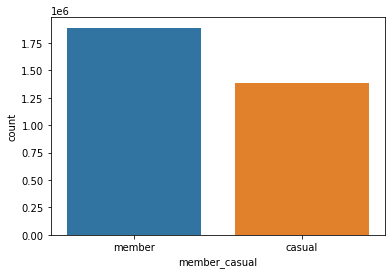

In [48]:
sns.countplot(data=df, x='member_casual');

Most of the rides were made by members.

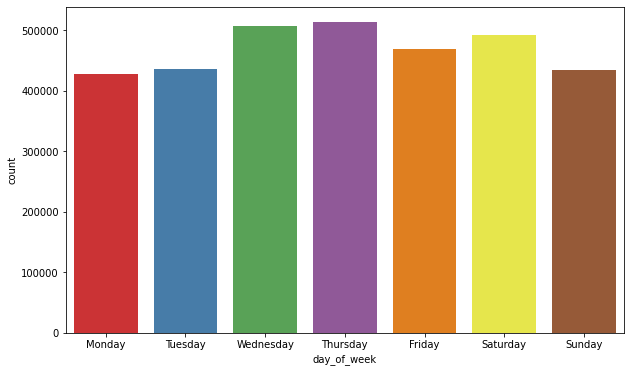

In [49]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='day_of_week', palette='Set1',
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday']);

There is no preferred day for riding.

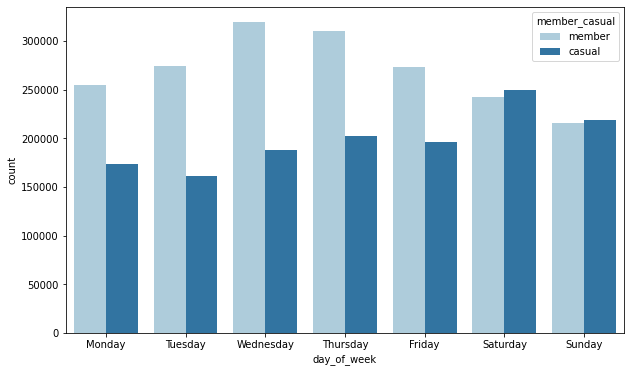

In [50]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='day_of_week', palette='Paired', hue='member_casual',
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday']);

During weekdays members rent more bikes than casual riders. Most probably, the reason for that is that many people become members so that they can ride to work. During the weekends, roughly the same numbers of members and casual riders rent bikes, presumably for leisure.

In [51]:
df['start_station_id'].nunique(), df['end_station_id'].nunique(), len(df)

(1488, 1524, 3279408)

In [52]:
df['rideable_type'].value_counts()

classic_bike     3246379
docked_bike        33011
electric_bike         18
Name: rideable_type, dtype: int64

The majority of bikes rented are classic bikes.

### Group By Date

In [53]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Date', 'Max_temperature', 'Min_temperature',
       'Average_temp', 'Departure_temp', 'HDD', 'CDD', 'Precipitation',
       'minutes_of_journey', 'return_to_same_station', 'day_of_week', 'Member',
       'hour'],
      dtype='object')

In [54]:
# Aggregation functions to be used in the Group By
d_agg = {'ride_id':'count', #number of rides
         'minutes_of_journey':['mean', 'max'], #average and maximal duration of a ride
         'hour':'median', #the typical hour when clients ride (50% would ride before that hour)
         'day_of_week':'first',
         'return_to_same_station':'sum', #number of rides that return to the same station
         'Member':'sum', #number of rides done by members
         'Max_temperature':'first',
         'Min_temperature':'first',
         'Average_temp':'first',
         'Precipitation':'first'}

In [55]:
# Group By Date
df_daily = df.groupby('Date').agg(d_agg)

In [56]:
len(df_daily.columns)

11

In [57]:
df_daily.columns = ['number_of_rides', 'mean_duration_of_ride', 'max_duration_of_ride',
                   'typical_hour_of_ride', 'day_of_week', 'num_return_same_station',
                   'num_members', 'max_temp', 'min_temp', 'average_temp', 'precipitation']

In [58]:
# Find number of casual rides
df_daily['num_casuals'] = df_daily['number_of_rides'] - df_daily['num_members']

In [59]:
df_daily

,number_of_rides,mean_duration_of_ride,max_duration_of_ride,typical_hour_of_ride,day_of_week,num_return_same_station,num_members,max_temp,min_temp,average_temp,precipitation,num_casuals
Date,,,,,,,,,,,,
2021-09-01,50769,13.403041,1398,13.0,Wednesday,2643,31948,25.6,17.2,21.4,7.13,18821
2021-09-02,126415,16.699419,1402,15.0,Thursday,6155,67654,25.0,16.1,20.6,0.10,58761
2021-09-03,115040,16.609162,1414,15.0,Friday,5947,62926,23.3,15.0,19.2,0.00,52114
2021-09-04,109075,19.569122,1436,14.0,Saturday,6504,50913,26.1,16.1,21.1,0.00,58162
2021-09-05,87474,18.609690,1378,15.0,Sunday,5683,41102,23.3,19.4,21.4,0.02,46372
2021-09-06,106297,19.203025,1436,15.0,Monday,7156,52357,27.2,20.6,23.9,0.00,53940
2021-09-07,106900,15.283536,1429,15.0,Tuesday,5484,64038,26.1,18.3,22.2,0.00,42862
2021-09-08,113113,14.695473,1435,15.0,Wednesday,5394,69324,27.8,21.1,24.4,0.00,43789
2021-09-09,77632,13.858808,1391,17.0,Thursday,3578,48061,24.4,20.0,22.2,0.26,29571


### More data analysis

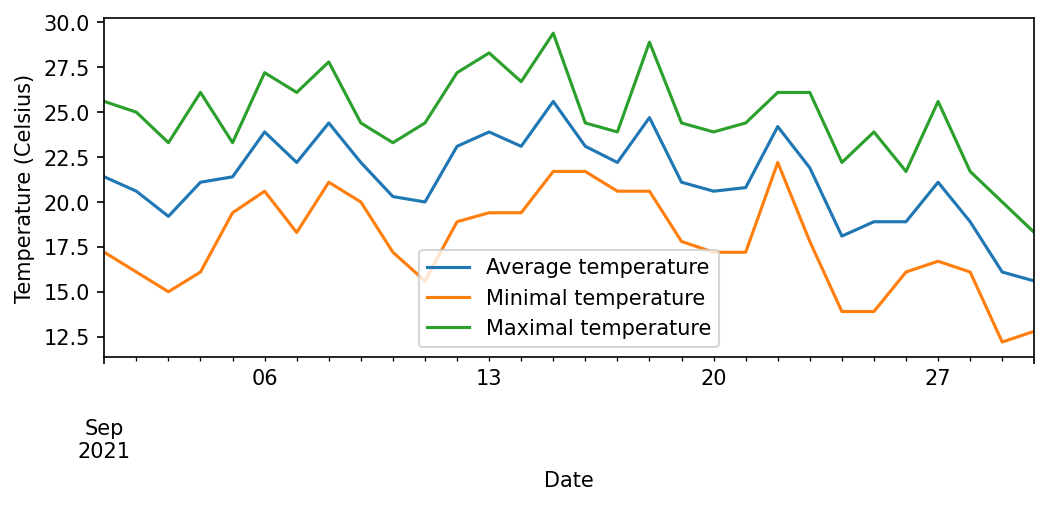

In [60]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_daily['average_temp'].plot(ax=ax, label='Average temperature')
df_daily['min_temp'].plot(ax=ax, label='Minimal temperature')
df_daily['max_temp'].plot(ax=ax, label='Maximal temperature')

ax.set_ylabel('Temperature (Celsius)')

plt.legend()
plt.show()

There is a tendency for the temperature to decrease towards the end of the month, which is quite expected.

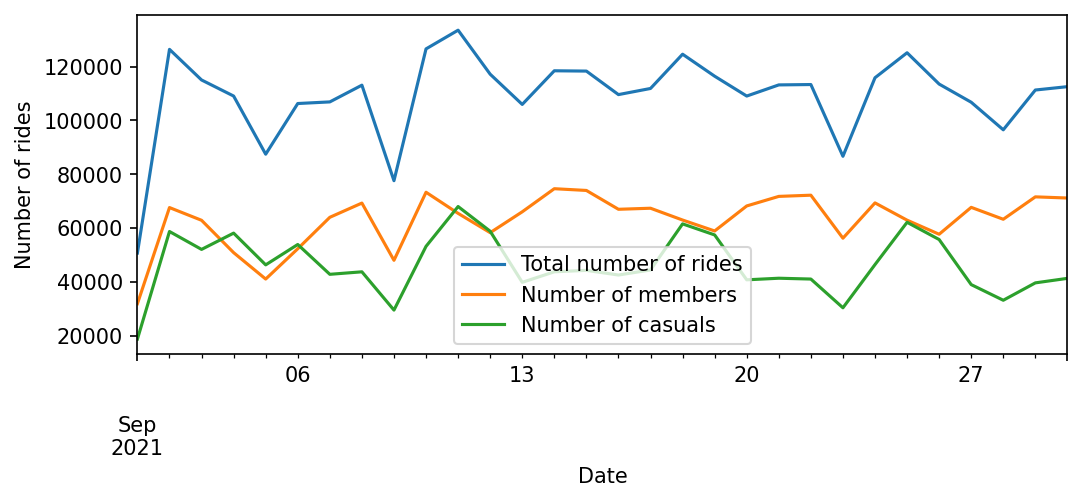

In [61]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_daily['number_of_rides'].plot(ax=ax, label='Total number of rides')
df_daily['num_members'].plot(ax=ax, label='Number of members')
df_daily['num_casuals'].plot(ax=ax, label='Number of casuals')

ax.set_ylabel('Number of rides')

plt.legend()
plt.show()

The number of rides perfomed by members is roughly constant over time. However, the number of casual rides varies periodically (green curve). The reason for that is that, as we saw, casual riders are less active during the week compared to the weekend.

It is interesting to note that at any given day the number of rides depends on the levels of precipitation (rain). Generally, the higher the precipation level, the lower the number of rides. During the first day of the month, the precipitation was very high and consequently the number of riders was very low. On the other hand, the number of riders does not seem to be influenced by the temperature.

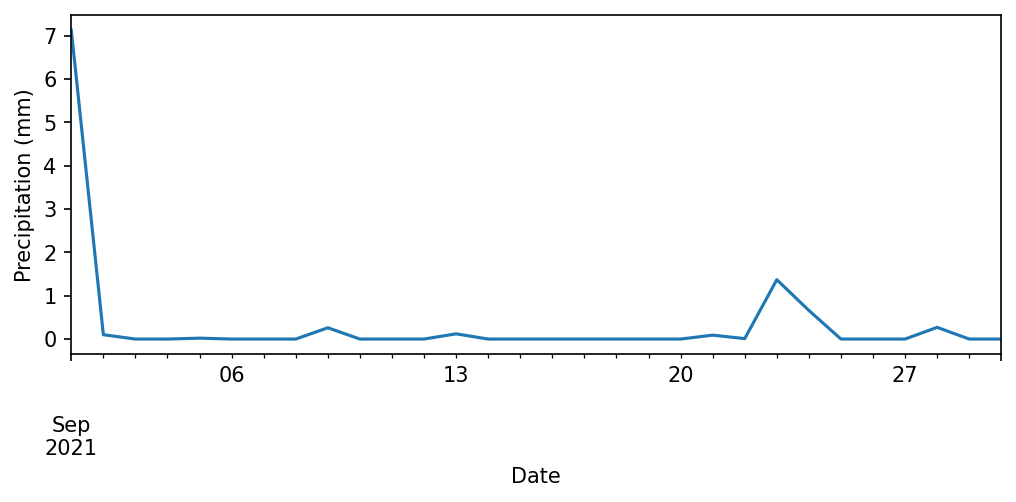

In [62]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_daily['precipitation'].plot(ax=ax)

ax.set_ylabel('Precipitation (mm)')

plt.show()

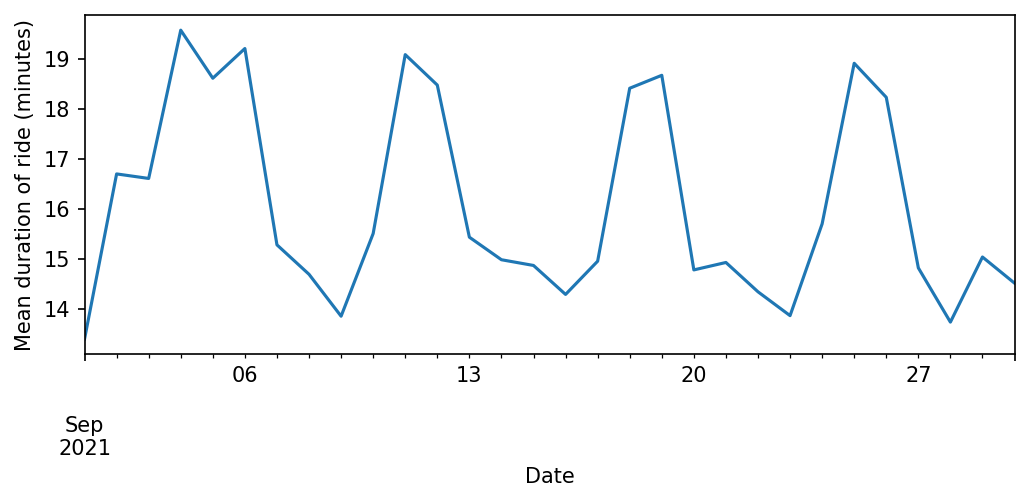

In [63]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_daily['mean_duration_of_ride'].plot(ax=ax)

ax.set_ylabel('Mean duration of ride (minutes)')

plt.show()

The average duration of a ride also has a 7-day cycle. Rides performed during the weekend tend to be longer than during the week. The reason for that is, most probably, that people tend to ride mostly for work during the week, which takes a fixed amount of time from home to the office and back, whereas they tend to ride for leisure during the weekend, which naturally takes more time.

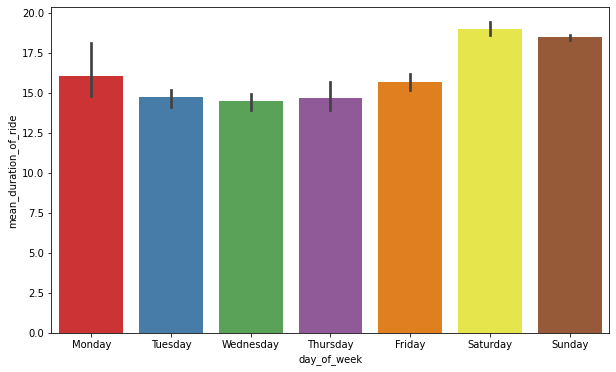

In [64]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_daily, x='day_of_week', y='mean_duration_of_ride', estimator=np.mean,
           palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday']);

In [80]:
df_daily['max_duration_of_ride'].mean()/60

23.57611111111111

The maximal duration of a ride on any day is approximately 24 hours. This indicates customers who rent a bike for a whole day and return it on the next day.

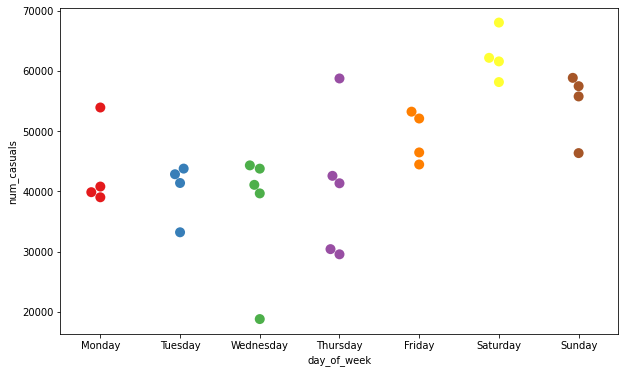

In [65]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=df_daily, x='day_of_week', y='num_casuals',
             palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday'], size=10);

As before, we see that casual riders tend to ride more duing the weekend, while members tend to ride more duing the week.

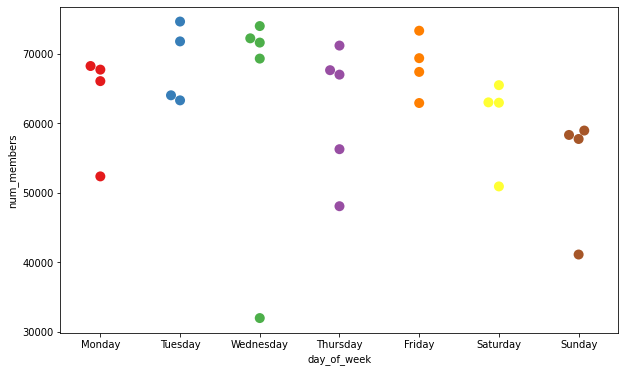

In [66]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=df_daily, x='day_of_week', y='num_members',
             palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday'], size=10);

Also people tend to ride at earlier hours during the weekend than during the week. That is consistent with the work-leisure interpretation - during the week people tend to ride for work and therefore they take the later parts of the day to return home (after 17:00), whereas during the weekend people tend to ride for leisure and therefore they do it during the earlier parts of the day when it's warmer.

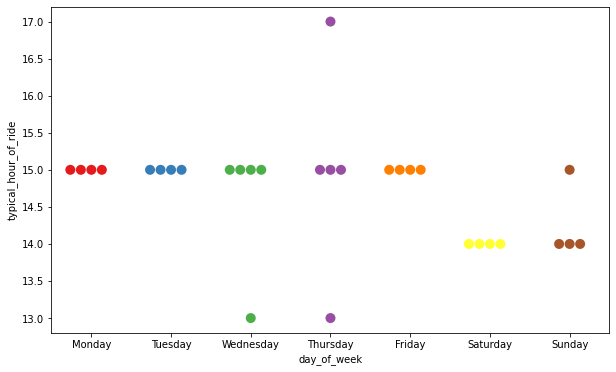

In [67]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=df_daily, x='day_of_week', y='typical_hour_of_ride',
           palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday'], size=10);

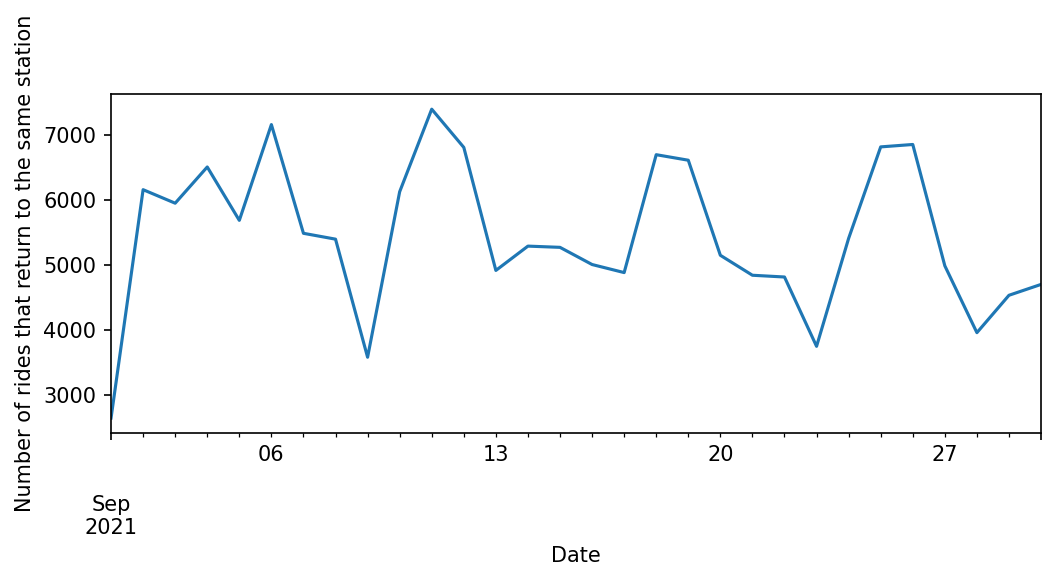

In [68]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_daily['num_return_same_station'].plot(ax=ax)

ax.set_ylabel('Number of rides that return to the same station')

plt.show()

We see the same weekly periodicity in the number of rides per day that return to the same station (i.e. when the start and end stations coincide). Again this makes sense under the work-leisure interpretation - during the week riders mostly travel for work and therefore do not return to the same station, whereas during the weekend riders travel for leisure, therefore they rent a bike from the closest station, go for a ride and then return to the same station.

This number is also sensitive to the precipitation level, in the same way as the total number of rides.

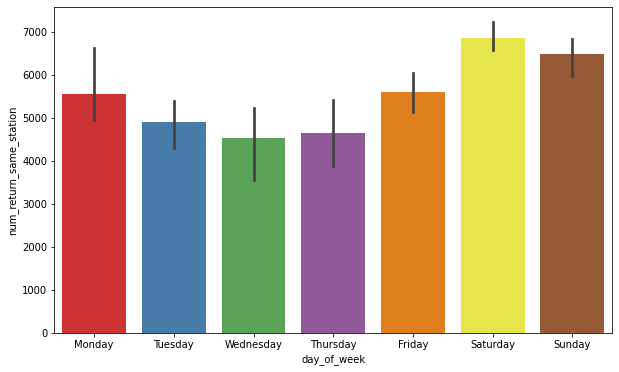

In [69]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_daily, x='day_of_week', y='num_return_same_station', estimator=np.mean,
           palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday']);